In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

# Task 1: Distribution of 'Outcome' variable
outcome_distribution = data['Outcome'].value_counts()
print("Distribution of Outcome (0: non-diabetic, 1: diabetic):\n", outcome_distribution)

# Task 2: Summary statistics for each feature for diabetic and non-diabetic patients
diabetic_summary = data[data['Outcome'] == 1].describe()
non_diabetic_summary = data[data['Outcome'] == 0].describe()
print("\nSummary Statistics for Diabetic Patients:\n", diabetic_summary)
print("\nSummary Statistics for Non-Diabetic Patients:\n", non_diabetic_summary)

# Task 3: Check for missing values and their distribution
missing_values = data.isnull().sum()
print("\nMissing Values per Feature:\n", missing_values)


Distribution of Outcome (0: non-diabetic, 1: diabetic):
 0    500
1    268
Name: Outcome, dtype: int64

Summary Statistics for Diabetic Patients:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                 

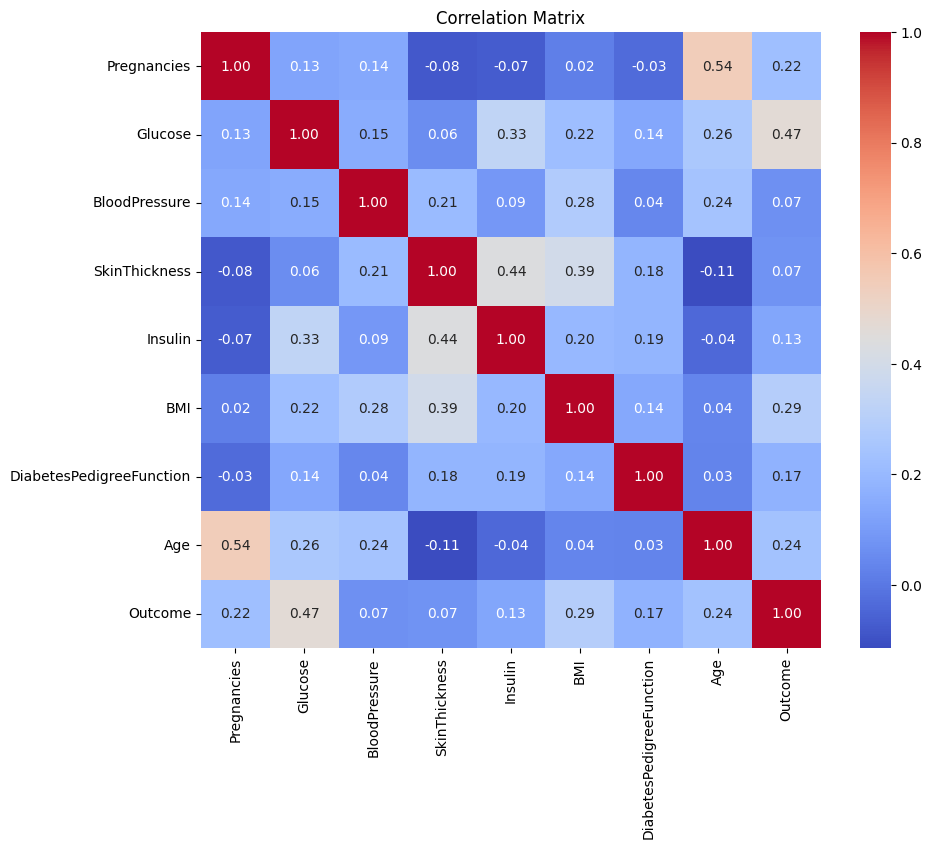

Correlation with Outcome (1: diabetic, -1: non-diabetic):
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation between features and 'Outcome' variable
correlation_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome (1: diabetic, -1: non-diabetic):\n", correlation_with_outcome)


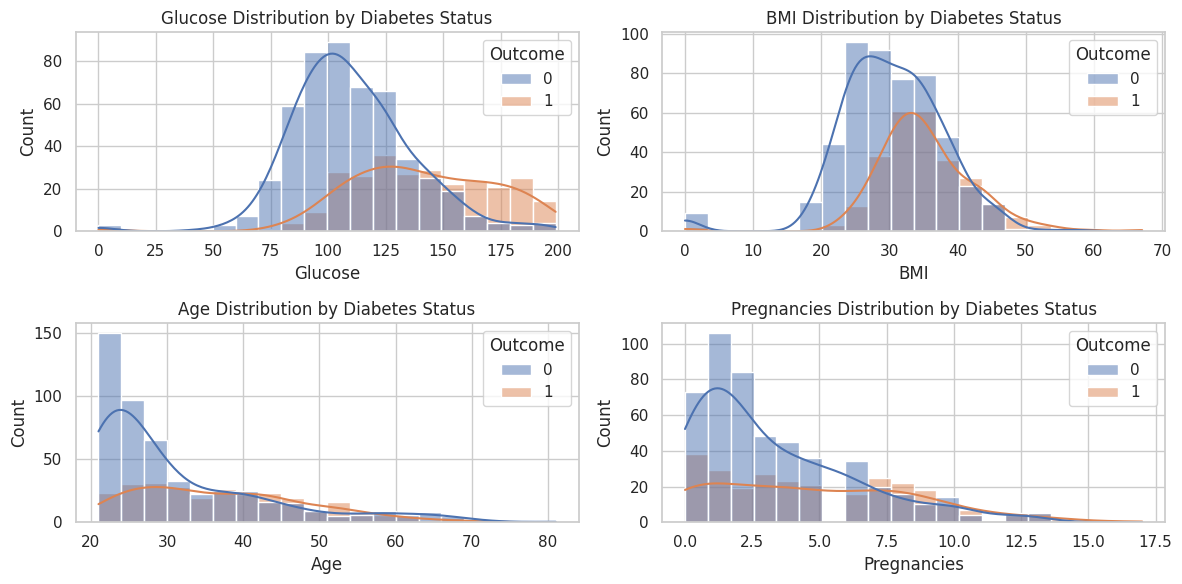

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Histograms of key features by diabetes status
plt.figure(figsize=(12, 6))
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, bins=20)
    plt.title(f'{feature} Distribution by Diabetes Status')
plt.tight_layout()
plt.show()

# Visualization 2: Box plots to detect outliers
plt.figure(figsize=(12, 6))
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} Box Plot by Diabetes Status')
plt.tight_layout()
plt.show()

# Visualization 3: Scatter plot for potential feature relationships
sns.pairplot(data=data, hue='Outcome', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features by Diabetes Status')
plt.show()


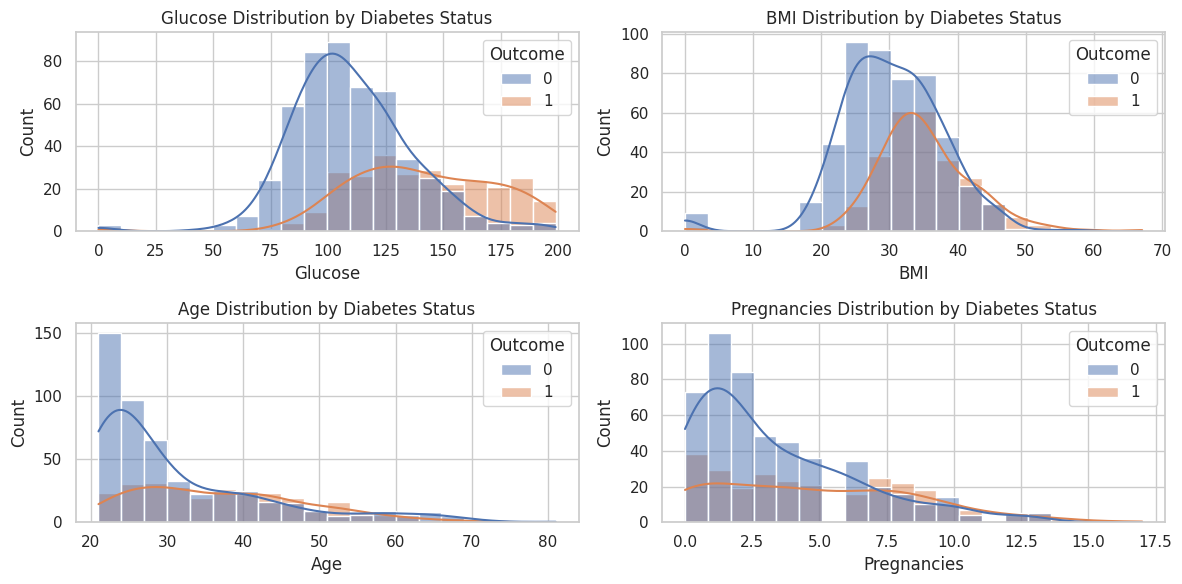

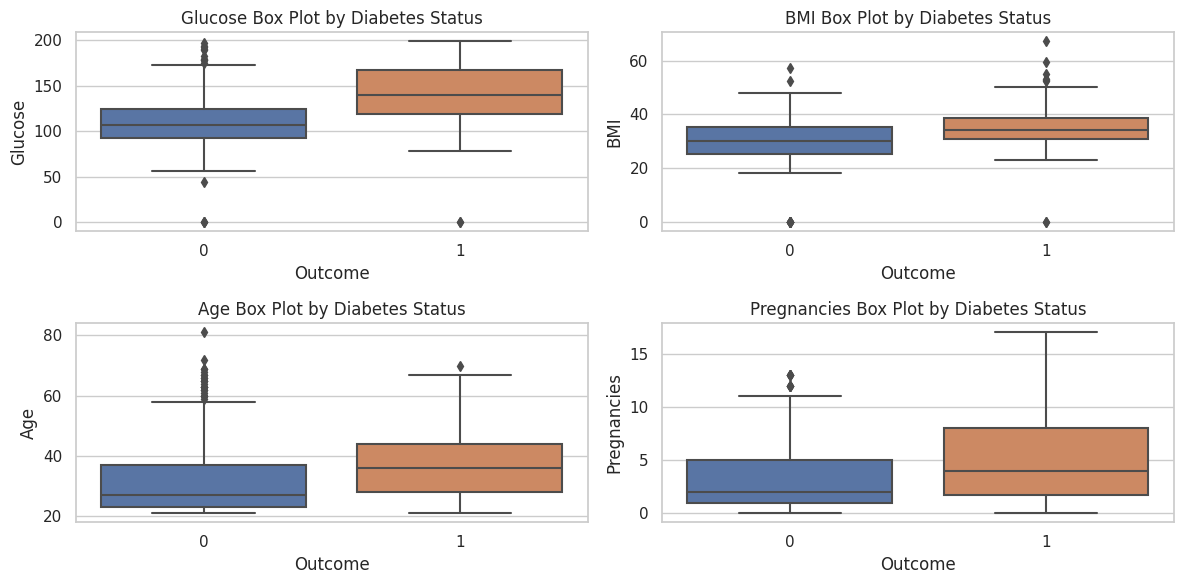

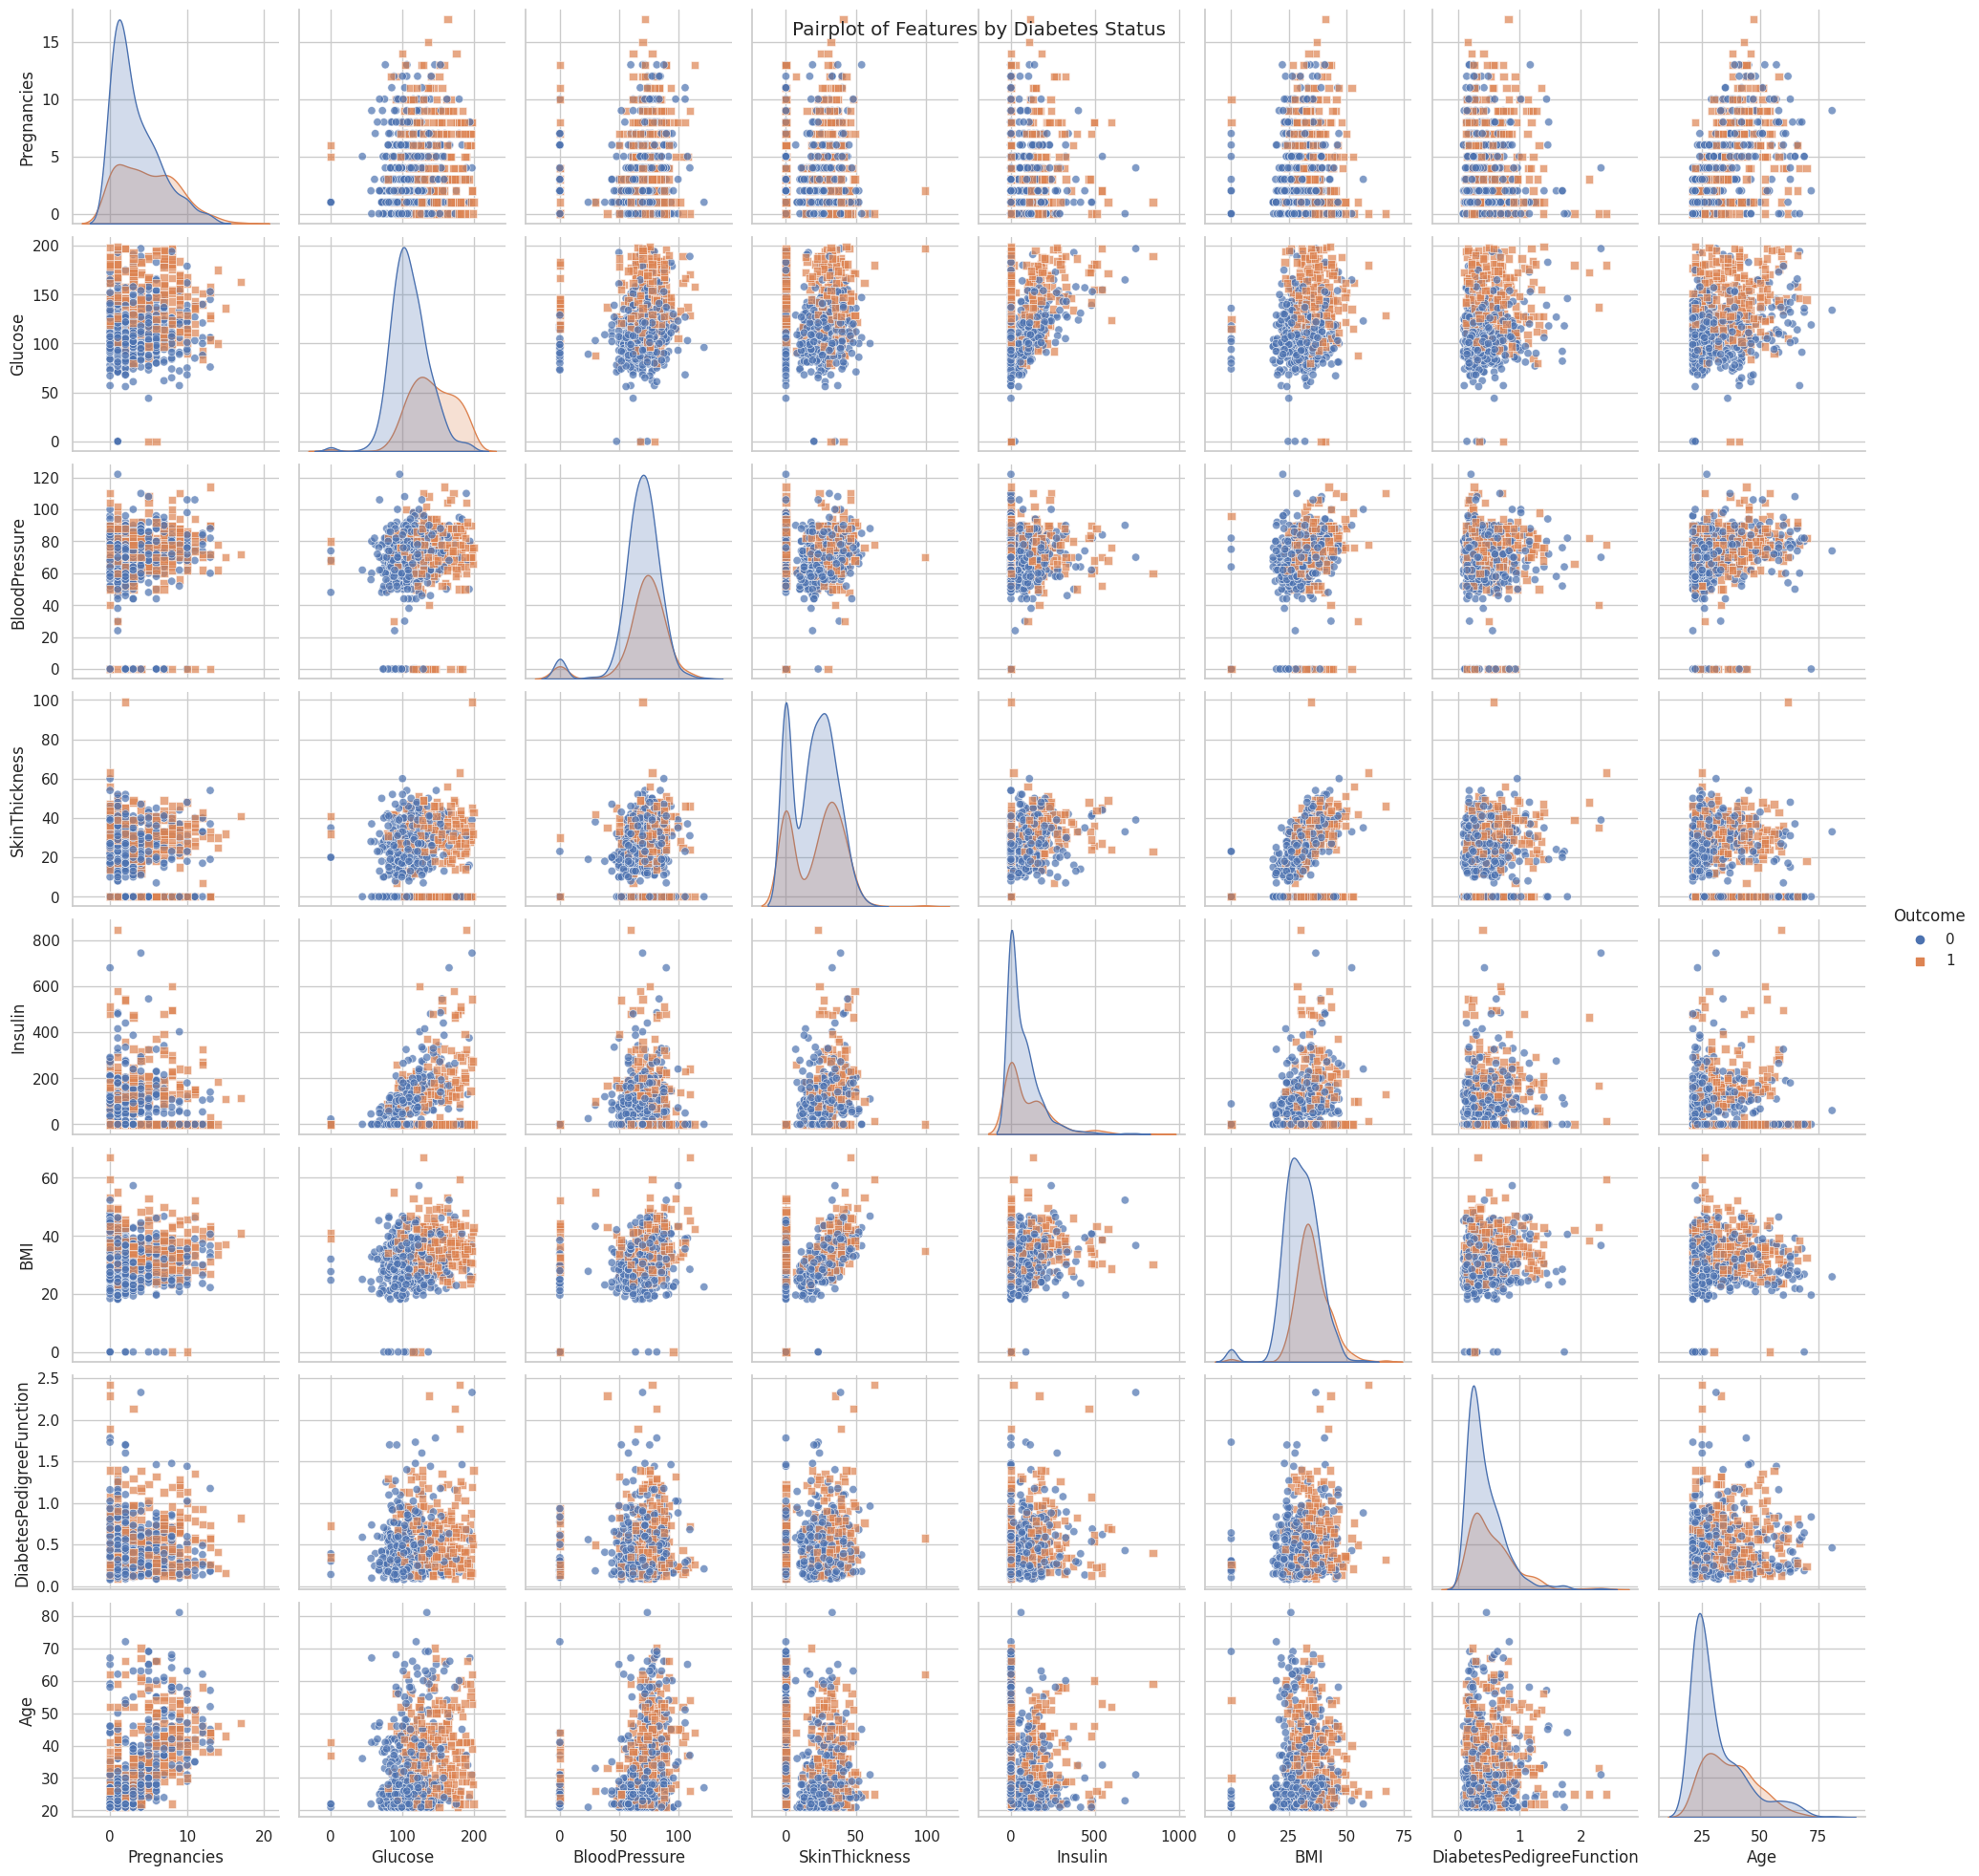

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualization 1: Histograms of key features by diabetes status
plt.figure(figsize=(12, 6))
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, bins=20)
    plt.title(f'{feature} Distribution by Diabetes Status')
plt.tight_layout()
plt.show()

# Visualization 2: Box plots to detect outliers
plt.figure(figsize=(12, 6))
features = ['Glucose', 'BMI', 'Age', 'Pregnancies']
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} Box Plot by Diabetes Status')
plt.tight_layout()
plt.show()

# Visualization 3: Pairplot for potential feature relationships
sns.pairplot(data=data, hue='Outcome', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features by Diabetes Status')
plt.show()


In [ ]:
# Separate features (X) and target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the data
model.fit(X, y)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Predicting Diabetes")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Separate features (X) and target variable (y)
X = data['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
y = data["Outcome"]

# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of machine learning algorithms to evaluate
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Baseline accuracy: Predicting all non-diabetic or all diabetic
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Baseline Accuracy (predicting all non-diabetic or all diabetic): {baseline_accuracy:.2f}")

# Evaluate and compare different algorithms
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")



Baseline Accuracy (predicting all non-diabetic or all diabetic): 0.65

Logistic Regression Accuracy: 0.74
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Decision Tree Accuracy: 0.72
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       151
           1       0.57      0.72      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.72      0.72       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Accuracy: 0.75
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       151
           1       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231


Support Vector Machine Accuracy: 0.74
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [ ]:
# Hyperparameter tuning for Random Forest (example)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nBest Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Best Random Forest Model:
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

# Separate features (X) and target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Initialize StratifiedKFold and SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store results across folds
accuracies = []
classification_reports = []

# Perform cross-validation with SMOTE
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data only
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit the Random Forest Classifier on the resampled data
    rf_classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and classification report for each fold
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracies.append(accuracy)

# Calculate and print average performance across folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average Accuracy across Folds: {average_accuracy:.2f}")

# Display the classification report for the last fold (you can loop through all if needed)
print("Classification Report for the Last Fold:")
print(classification_reports[-1])


Average Accuracy across Folds: 0.75
Classification Report for the Last Fold:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       100
           1       0.55      0.68      0.61        53

    accuracy                           0.70       153
   macro avg       0.68      0.69      0.68       153
weighted avg       0.72      0.70      0.71       153



In [ ]:
# Separate features (X) and target variable (y)
X = data[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
y = data["Outcome"]

# Split the dataset into training and testing sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of machine learning algorithms to evaluate
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Baseline accuracy: Predicting all non-diabetic or all diabetic
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Baseline Accuracy (predicting all non-diabetic or all diabetic): {baseline_accuracy:.2f}")

# Evaluate and compare different algorithms
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")



Baseline Accuracy (predicting all non-diabetic or all diabetic): 0.65

Logistic Regression Accuracy: 0.74
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231


Decision Tree Accuracy: 0.70
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.65      0.60        80

    accuracy                           0.70       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231


Random Forest Accuracy: 0.74
Random Forest Classification Report:
              precision    recall  f1-score   support

        

In [ ]:
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store results across folds
accuracies = []
classification_reports = []

# Perform cross-validation without SMOTE
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the Random Forest Classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and classification report for each fold
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    accuracies.append(accuracy)

# Calculate and print average performance across folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average Accuracy across Folds: {average_accuracy:.2f}")

# Display the classification report for the last fold (you can loop through all if needed)
print("Classification Report for the Last Fold:")
print(classification_reports[-1])


Average Accuracy across Folds: 0.74
Classification Report for the Last Fold:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       100
           1       0.56      0.60      0.58        53

    accuracy                           0.70       153
   macro avg       0.67      0.68      0.67       153
weighted avg       0.71      0.70      0.70       153



In [ ]:
# Display the classification report for all folds
for i, report in enumerate(classification_reports, start=1):
    print(f"Classification Report for Fold {i}:")
    print(report)


Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71   